In [65]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import time

In [66]:
input_image = Input((784,))
encode_layer1 = Dense(256, activation='softmax')(input_image)
encode_layer2 = Dense(128, activation='softmax')(encode_layer1)
encode_layer3 = Dense(64, activation='softmax')(encode_layer2)
encode = Dense(32, activation='softmax')(encode_layer3)



In [67]:
decode_input = Input((32,))
decode_layer1 = Dense(64, activation='softmax')(decode_input)
decode_layer2 = Dense(128, activation='softmax')(decode_layer1)
decode_layer3 = Dense(256, activation='softmax')(decode_layer2)

decode = Dense(784, activation='sigmoid')(decode_layer3)

In [68]:
# auto_encoder = Model(input_image, decode)

In [69]:
encoder = Model(input_image, encode)
decoder = Model(decode_input, decode)

In [70]:
auto_encoder_output = decoder(encoder(input_image))
auto_encoder = Model(input_image, auto_encoder_output)

auto_encoder.compile(optimizer='adam', loss='mse')

In [71]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [72]:
start = time.time()
auto_encoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=1)
finish = time.time()
elapsed = finish - start
if elapsed < 60:
    print("Elapsed time: ", elapsed, "seconds")
else:
    elapsed /= 60
    print("Elapsed time: ", elapsed, "minutes")


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.2149 - val_loss: 0.1696
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1576 - val_loss: 0.1280
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.1206 - val_loss: 0.1036
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0993 - val_loss: 0.0902
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0876 - val_loss: 0.0824
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0806 - val_loss: 0.0772
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0760 - val_loss: 0.0731
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0722 - val_loss: 0.0701
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0694 - val_loss: 0.0687
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0682 - val_loss: 0.0681
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0679 - val_loss: 0.0679
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━

In [73]:
encoder_images = encoder.predict(x_test)
decoder_images = decoder.predict(encoder_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


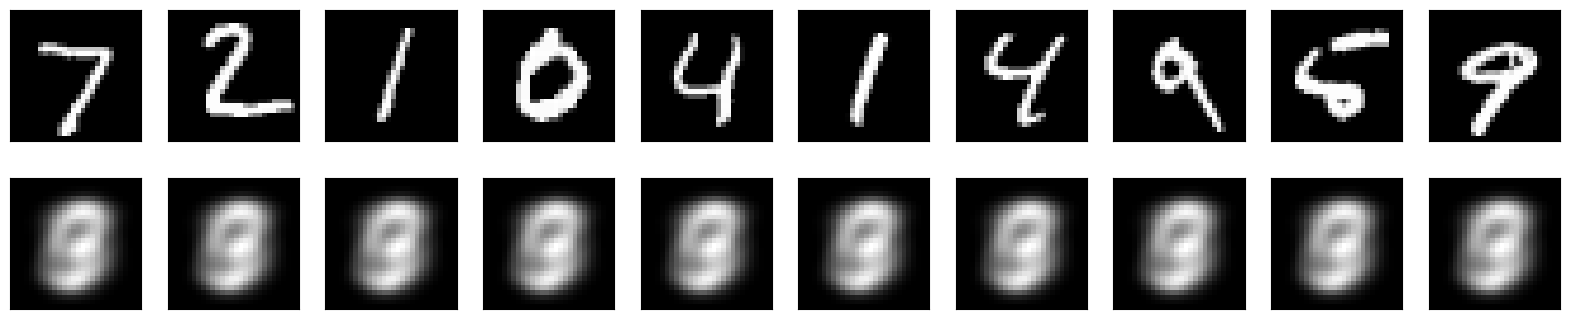

In [74]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoder_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()